In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
np.random.seed(0)

In [2]:
def mu(tau, y):
    loc = tau * y.size * np.mean(y) / (1 + y.size * tau)
    scale = np.sqrt(1 / (1 + y.size * tau))
    return np.random.normal(loc, scale)

In [3]:
def tau(mu, y):
    shape = 2 + y.size / 2
    scale = 1 + 0.5 * np.sum((y - mu) ** 2)
    return np.random.gamma(shape, scale)

In [4]:
data = np.loadtxt('MCMCexampleData.txt')

In [5]:
def sample(tau_0, data, numSamples):
    tau_i = tau_0
    mu_i = 0
    samples = np.zeros([numSamples,2])
    for i in range(numSamples):
        mu_i = mu(tau_i, data)
        tau_i = tau(mu_i, data)
        samples[i] = [mu_i, tau_i]
    return samples

In [6]:
samples = sample(1200, data, 1000)

In [7]:
df = pd.DataFrame(samples, columns=["mu", "tau"])

/home/dave/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


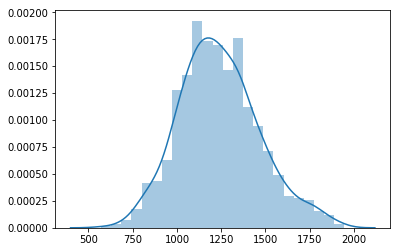

In [10]:
sns.distplot(samples[:,1])

/home/dave/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/dave/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


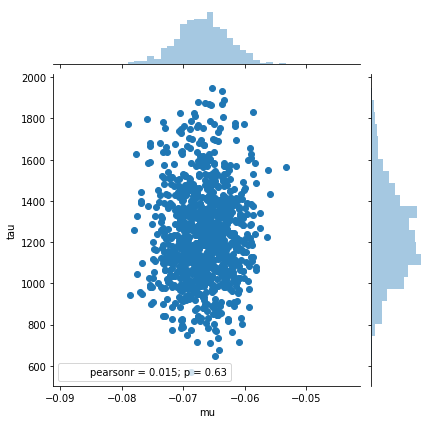

In [9]:
sns.jointplot(x="mu", y="tau", data=df)